In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

In [3]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

In [4]:
nyc = pd.read_csv('nyc-rolling-sales.csv')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [5]:
nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [6]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [7]:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET", "SALE PRICE"]

for col in numeric: 
    nyc[col] = pd.to_numeric(nyc[col], errors='coerce')

In [8]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       84548 non-null  object 
 8   BUILDING CLASS AT PRESENT       84548 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                84548 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [8]:
nyc['SALE DATE']= pd.to_datetime(nyc['SALE DATE'])

In [9]:
nyc['sale_year'] = pd.DatetimeIndex(nyc['SALE DATE']).year.astype("category")
nyc['sale_month'] = pd.DatetimeIndex(nyc['SALE DATE']).month.astype("category")
pd.crosstab(nyc['sale_month'],nyc['sale_year'])

sale_year,2016,2017
sale_month,,
1,0,6871
2,0,6323
3,0,7705
4,0,6402
5,0,7461
6,0,8293
7,0,6319
8,0,5681
9,7779,0


In [10]:
nyc.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [11]:
nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,2017,7
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,2016,12
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,2016,12
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,2016,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,2016,11
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,2017,4
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,2017,7
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,2016,12


In [12]:
nyc['BOROUGH'] = nyc['BOROUGH'].astype(str)

nyc.rename(columns={'SALE PRICE': 'PRICE'}, inplace=True)
nyc["BOROUGH"].replace({"1": "Manhattan", "2": "Bronx", "3": "Brooklyn", "4":"Queens","5":"Island"}, inplace=True)
nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,PRICE,SALE DATE,sale_year,sale_month
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,2017,7
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,2016,12
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,2016,12
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,2016,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,2016,11
84544,Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,2017,4
84545,Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,2017,7
84546,Island,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,2016,12


In [13]:
nyc.dropna(axis="rows", inplace=True)

In [14]:
nyc.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,PRICE
count,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,4.824400e+04,4.824400e+04,48244.000000,48244.000000,4.824400e+04
mean,4984.532191,234.324662,10939.681328,2.566537,0.249171,2.834632,3.358117e+03,3.669753e+03,1827.765173,1.475769,1.153281e+06
std,3427.418090,496.361521,1072.752086,17.465481,10.988072,20.750418,3.143590e+04,2.947491e+04,464.361153,0.833589,1.340131e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2206.750000,21.000000,10469.000000,1.000000,0.000000,1.000000,1.413000e+03,8.280000e+02,1920.000000,1.000000,8.042000e+04
50%,4660.500000,45.000000,11217.000000,1.000000,0.000000,1.000000,2.140000e+03,1.620000e+03,1931.000000,1.000000,4.800000e+05
75%,6996.000000,94.000000,11237.000000,2.000000,0.000000,2.000000,3.071000e+03,2.520000e+03,1961.000000,2.000000,8.300000e+05
max,16319.000000,9009.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [15]:
#Rata Rata luas Tanah

nyc.groupby("BOROUGH").agg({"LAND SQUARE FEET": [np.mean, np.std, np.size]})

LAND SQUARE FEET                       
                      mean           std     size
BOROUGH                                          
Bronx          3947.091502  18493.371717   7049.0
Brooklyn       2166.259825  14072.627073  24047.0
Island         6337.845972  65891.823764   5064.0
Manhattan      5764.031809  13879.506446   1006.0
Queens         3989.926792  40572.755028  11078.0

In [16]:
#Cara 1
mean_Queens = 3989.926792  #rata rata luas tanah
sd = 40572.755028        #standard deviation luas tanah di Queens
n = 11078           #Jumlah tanah di Queens
z = 1.96          #z-score (95%)

In [17]:
se = sd / np.sqrt(n)
se

385.48174685518035

In [18]:
lcb = mean_Queens - z* se  #lower limit of the CI
ucb = mean_Queens + z* se  #upper limit of the CI
lcb,ucb

(3234.382568163847, 4745.471015836154)

In [19]:
nyc.set_index('BOROUGH', inplace=True)

In [ ]:
#Cara 2 (Hasilnya sama seperti Cara 1)

In [ ]:
#Mean

In [20]:
Pop_Mean = nyc.loc[["Queens"], "LAND SQUARE FEET"].mean()
Pop_Mean

3989.926791839682

In [ ]:
#Median

In [21]:
Pop_Median = nyc.loc[["Queens"], "LAND SQUARE FEET"].median()
Pop_Median

2780.0

In [ ]:
#Modus

In [22]:
Pop_Mode = nyc.loc[["Queens"], "LAND SQUARE FEET"].mode()
Pop_Mode

0    4000.0
dtype: float64

In [ ]:
#Range

In [23]:
Pop_Range_Max= nyc.loc[["Queens"], "LAND SQUARE FEET"].max()
Pop_Range_Min= nyc.loc[["Queens"], "LAND SQUARE FEET"].min()
Pop_Range= Pop_Range_Max - Pop_Range_Min
Pop_Range

4228100.0

In [ ]:
#Std Deviasi

In [24]:
Pop_std = nyc.loc[["Queens"], "LAND SQUARE FEET"].std()
Pop_std

40572.755027620246

In [ ]:
#Variansi

In [25]:
Pop_Var = nyc.loc[["Queens"], "LAND SQUARE FEET"].var()
Pop_Var

1646148450.5312839

In [ ]:
#Std Error

In [26]:
#SE=σ/√n (#standard_error = pop_std_dev_mass/np.sqrt(n))

standard_error = Pop_std/np.sqrt(n)
standard_error

385.4817468515723

In [27]:
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import expon
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import bernoulli

In [ ]:
#Distribusi luas Tanah di QUeens

C:\Users\welly\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


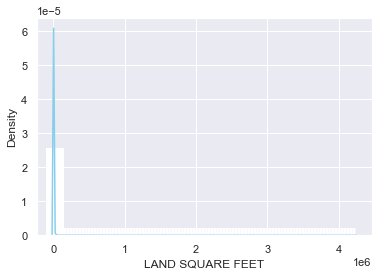

In [28]:
Queens_Dist = nyc.loc[["Queens"], "LAND SQUARE FEET"]
Dist_Norm = sns.distplot(Queens_Dist,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

In [29]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
#H0 = Harga rumah mengalami peningkatan 2017>2016
#H1 = Harga rumah tidak mengalami peningkatan 2017=2016

nyc.groupby("sale_year").agg({"PRICE": [np.mean, np.std, np.size]}).astype(str)

PRICE                             
                         mean                 std     size
sale_year                                                 
2016       1199557.5746715157   9782361.141971014  17048.0
2017        1127992.452205411  15014918.807464048  31196.0

In [31]:
mean_2016 = 1199557.5746715157 #mean price in 2016
sd_2016 = 40572.755028         #standard deviation in 2016

mean_2017 = 1127992.452205411  #mean price in 2017
sd_2017 = 15014918.807464048   #standard deviation in 2017

In [32]:
nyc['sale_year'] = nyc['sale_year'].astype("int64")
nyc['PRICE'] = nyc['PRICE'].astype("int64")

In [33]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48244 entries, Manhattan to Island
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NEIGHBORHOOD                    48244 non-null  object        
 1   BUILDING CLASS CATEGORY         48244 non-null  object        
 2   TAX CLASS AT PRESENT            48244 non-null  object        
 3   BLOCK                           48244 non-null  int64         
 4   LOT                             48244 non-null  int64         
 5   EASE-MENT                       48244 non-null  object        
 6   BUILDING CLASS AT PRESENT       48244 non-null  object        
 7   ADDRESS                         48244 non-null  object        
 8   APARTMENT NUMBER                48244 non-null  object        
 9   ZIP CODE                        48244 non-null  int64         
 10  RESIDENTIAL UNITS               48244 non-null  int64         
 11

In [37]:
sm.stats.ztest("2016"["PRICE"], "2017"["PRICE"],alternative='two-sided')

<>:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
<ipython-input-37-036872f9c02e>:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
  sm.stats.ztest("2016"["PRICE"], "2017"["PRICE"],alternative='two-sided')
<ipython-input-37-036872f9c02e>:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
  sm.stats.ztest("2016"["PRICE"], "2017"["PRICE"],alternative='two-sided')


TypeError: string indices must be integers